### Logistic Regression

In this notebook we are going to use the buildin dataset to create a logistic model that does binary classification.

First we are going to start by loading the data as follows:

In [2]:
data(mtcars)
View(head(mtcars))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### Convert Target Variable to Factor
Logistic regression expects the outcome to be a factor (i.e., categorical):

In [5]:
mtcars$am <- as.factor(mtcars$am)

### Check for Missing Values
In the following code cell we are going to check if there are any missing values.

In [8]:
colSums(is.na(mtcars)) 

mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
   0    0    0    0    0    0    0    0    0    0    0

### Split into Training and Testing Sets

In [11]:
library(caret)
set.seed(123)

train_index <- createDataPartition(mtcars$am, p = 0.8, list = FALSE)
train <- mtcars[train_index, ]
test <- mtcars[-train_index, ]

Warning message:
"package 'caret' was built under R version 4.4.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Loading required package: lattice



### Fitting the Logistic Regression

In [14]:
# Fit logistic regression (family = binomial for logistic)
log_model <- glm(am ~ mpg + hp + wt, data = train, family = binomial)
summary(log_model)


Call:
glm(formula = am ~ mpg + hp + wt, family = binomial, data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -15.18681   37.51377  -0.405   0.6856  
mpg           1.18674    1.48090   0.801   0.4229  
hp            0.08019    0.07696   1.042   0.2974  
wt           -6.66058    3.31051  -2.012   0.0442 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.4987  on 26  degrees of freedom
Residual deviance:  8.6017  on 23  degrees of freedom
AIC: 16.602

Number of Fisher Scoring iterations: 9


### Predict on Test Set
We'll predict probabilities, then convert to class (`0` or `1`) using a threshold (typically `0.5`):

In [17]:
# Predict probabilities
probs <- predict(log_model, newdata = test, type = "response")
predicted_classes <- ifelse(probs > 0.5, 1, 0)
predicted_classes <- as.factor(predicted_classes)

### Evaluate the Model
We'll compute accuracy, confusion matrix, and other metrics:

In [20]:
# Actual values
actual <- test$am
accuracy <- mean(predicted_classes == actual)
cat("Accuracy:", accuracy, "\n")

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 0
         1 0 2
                                     
               Accuracy : 1          
                 95% CI : (0.4782, 1)
    No Information Rate : 0.6        
    P-Value [Acc > NIR] : 0.07776    
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.6        
         Detection Rate : 0.6        
   Detection Prevalence : 0.6        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : 0          
                                     

Accuracy: 1 


### Visualize the Model Fit
Here's a basic visualization using the `ggplot2` library:

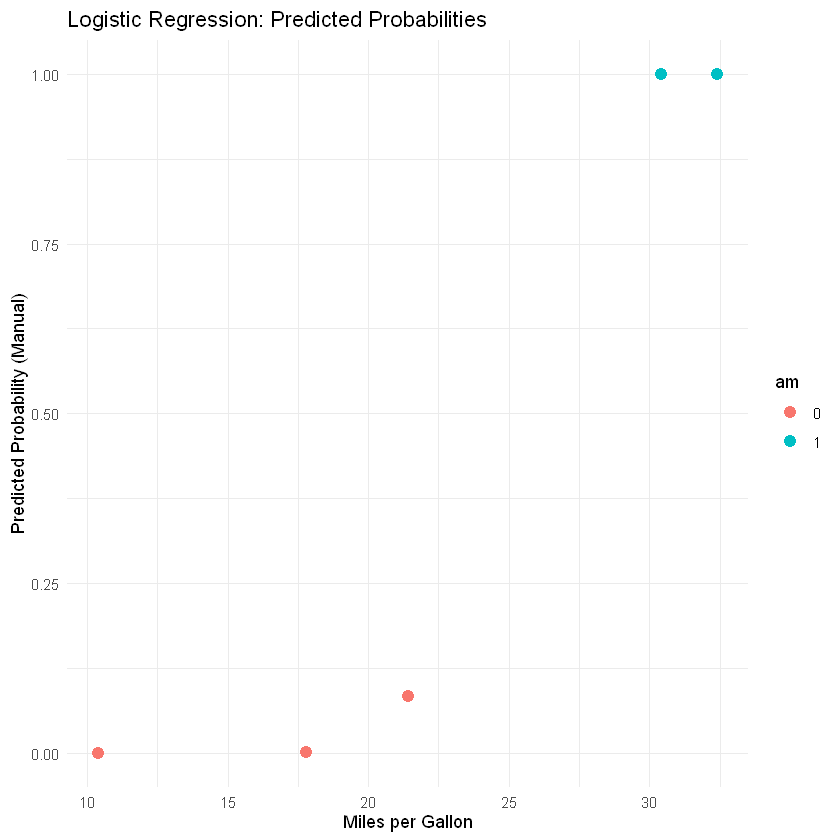

In [25]:
library(ggplot2)

# Add predicted probabilities to test set
test$prob <- probs
test$am_numeric <- as.numeric(as.character(test$am))

ggplot(test, aes(x = mpg, y = prob, color = am)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "Logistic Regression: Predicted Probabilities", x = "Miles per Gallon", y = "Predicted Probability (Manual)")

### Reusable Logistic Regression Function in R

This function will:
- Prepare the data
- Split into training and testing
- Fit a logistic regression model
- Predict on the test set
- Evaluate performance
- Optionally plot predicted probabilities

In [34]:
logistic_pipeline <- function(data, target, predictors, split_ratio = 0.8, threshold = 0.5, plot = TRUE) {
  library(caret)
  library(ggplot2)

  # Convert target to factor if not already
  data[[target]] <- as.factor(data[[target]])

  # Split the data
  set.seed(123)
  train_index <- createDataPartition(data[[target]], p = split_ratio, list = FALSE)
  train <- data[train_index, ]
  test <- data[-train_index, ]

  # Construct formula
  formula <- as.formula(paste(target, "~", paste(predictors, collapse = " + ")))

  # Fit logistic regression model
  model <- glm(formula, data = train, family = binomial)
  print(summary(model))

  # Predict probabilities on test set
  probs <- predict(model, newdata = test, type = "response")
  pred_class <- as.factor(ifelse(probs > threshold, 1, 0))
  actual <- test[[target]]

  # Evaluation
  cat("\n--- Evaluation ---\n")
  print(confusionMatrix(pred_class, actual))
  cat("Accuracy:", mean(pred_class == actual), "\n")

  # Optional visualization
  if (plot) {
    test$prob <- probs
    ggplot(test, aes_string(x = predictors[1], y = "prob", color = target)) +
      geom_point(size = 3) +
      theme_minimal() +
      labs(title = "Predicted Probabilities", x = predictors[1], y = "P(1 | X)")
  }

  return(list(model = model, test = test))
}
logistic_pipeline(mtcars, target = "am", predictors = c("mpg", "hp", "wt"))


Call:
glm(formula = formula, family = binomial, data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -15.18681   37.51377  -0.405   0.6856  
mpg           1.18674    1.48090   0.801   0.4229  
hp            0.08019    0.07696   1.042   0.2974  
wt           -6.66058    3.31051  -2.012   0.0442 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.4987  on 26  degrees of freedom
Residual deviance:  8.6017  on 23  degrees of freedom
AIC: 16.602

Number of Fisher Scoring iterations: 9


--- Evaluation ---
Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 0
         1 0 2
                                     
               Accuracy : 1          
                 95% CI : (0.4782, 1)
    No Information Rate : 0.6        
    P-Value [Acc > NIR] : 0.07776    
                                     
                  Kappa : 1  

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


$model

Call:  glm(formula = formula, family = binomial, data = train)

Coefficients:
(Intercept)          mpg           hp           wt  
  -15.18681      1.18674      0.08019     -6.66058  

Degrees of Freedom: 26 Total (i.e. Null);  23 Residual
Null Deviance:	    36.5 
Residual Deviance: 8.602 	AIC: 16.6

$test
                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Lincoln Continental 10.4   8 460.0 215 3.00 5.424 17.82  0  0    3    4
Fiat 128            32.4   4  78.7  66 4.08 2.200 19.47  1  1    4    1
Honda Civic         30.4   4  75.7  52 4.93 1.615 18.52  1  1    4    2
                            prob
Hornet 4 Drive      8.444820e-02
Merc 280C           8.147488e-04
Lincoln Continental 3.651193e-10
Fiat 128            9.999991e-01
Honda Civic         9.999994e-01
